In [1]:
%cd ..

/Users/CobaLu01/CobaRepos/recoexplainer


## Import

In [76]:
import random
import pandas as pd
import umap
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from recoexplainer.config import cfg
from recoexplainer.data_reader.data_reader import DataReader
from recoexplainer.models.emf_model import EMFModel

from recoexplainer.recommender import Recommender 
from recoexplainer.evaluator import Splitter, Evaluator, ExplanationEvaluator
from recoexplainer.explain import EMFExplainer

## Import data

In [10]:
data = DataReader(**cfg.ml100k)
data.make_consecutive_ids_in_dataset()
sp = Splitter()
train, test = sp.split_leave_n_out(data, frac=0.1)

## Model training & recommending

In [ ]:
emf = EMFModel(**cfg.model.emf)

In [ ]:
emf.fit(train)

In [16]:
rec = Recommender(train, emf)
rec = rec.recommend_all()

## Generating Explanations

In [17]:
explanations = EMFExplainer(emf, rec, data)

In [18]:
res = explanations.explain_recommendations()

In [22]:
ex = ExplanationEvaluator(train.num_user)

Evaluationg an explanation:

In [32]:
ex.mean_explaianable_precision(res, emf.explainability_matrix)

0.3957582184517506

In [92]:
def plot_model(model, dt, user_X):
    
    dim_red_model = umap.UMAP().fit_transform(model.item_embedding())
    dim_red_model_usr = umap.UMAP().fit_transform(model.user_embedding())

    rated_items = dt.dataset[dt.dataset.userId == user_X].itemId

    item_emb_for_user_X = pd.DataFrame.from_dict({
        'x': dim_red_model[:,0],
        'y': dim_red_model[:,1],
        'expl': model.explainability_matrix[user_X, :]})

    item_emb_for_user_X = item_emb_for_user_X.sort_values(by=['expl'])

    fig = go.Figure()
    
    fig.add_trace(go.Scatter(mode="markers",
                             x=item_emb_for_user_X["x"], 
                             y=item_emb_for_user_X["y"], 
                             marker=dict(color=item_emb_for_user_X["expl"]), showlegend=True))
    
    sns.scatterplot(data=item_emb_for_user_X, x="x", y="y", hue="expl")



    plt.scatter(dim_red_model[user_X,0], 
            dim_red_model[user_X,1], 
            marker='X', s=100, c='#419ede')

In [95]:
rand_usr = random.choice(data.dataset.userId.unique())

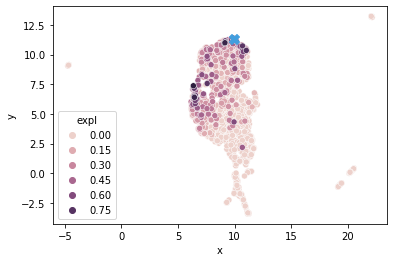

In [96]:
plot_model(emf, train, rand_usr)